In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator

import numpy as np
import matplotlib.pyplot as plt

simulator=AerSimulator()

In [6]:
pi=np.pi
phi=Parameter('phi')

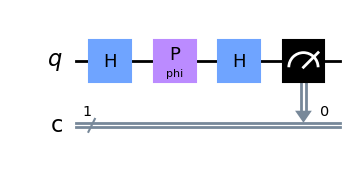

In [29]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.p(phi,0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [30]:
qc_trans=transpile(qc,backend=simulator)

In [36]:
runs=8126
phi_screen=10*pi
phi_list=np.random.uniform(-phi_screen/2,phi_screen/2,runs)

circuits=[]

for phi_val in phi_list:
    qc_sim=qc_trans.assign_parameters({phi:phi_val})
    circuits.append(qc_sim)

circuits[9].draw()

┌───┐┌──────────┐┌───┐┌─┐
  q: ┤ H ├┤ P(12.94) ├┤ H ├┤M├
     └───┘└──────────┘└───┘└╥┘
c: 1/═══════════════════════╩═
                            0

In [37]:
job=simulator.run(circuits,shots=1000,memory=True)
sim_results=job.result()

In [38]:
hit=[]

for i,circ in enumerate(circuits):
    result=sim_results.get_memory(circ)[0]
    if result == '0':
        hit.append(phi_list[i])

In [39]:
z_hit=np.random.uniform(-1,1,len(hit))

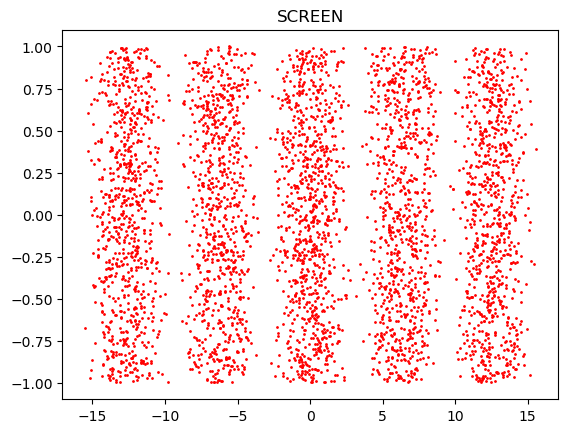

In [40]:
plt.scatter(hit,z_hit,s=1,color='#FF0000')
plt.title('SCREEN')
plt.show()